In [1562]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1563]:
import warnings
warnings.filterwarnings('ignore')

In [1564]:
matplotlib.rcParams.update({'font.size': 14})

In [1565]:
def fit_pred(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train) 
    y_test_pred = model.predict(x_test)
    
    r2_train = r2(y_train, y_train_pred)
    mae_train = mae(y_train, y_train_pred)
    print(f'r2_train = {r2_train}, mae_train: {mae_train}')
    
    r2_test = r2(y_test, y_test_pred)
    mae_test = mae(y_test, y_test_pred)
    print(f'r2_test = {r2_test}, mae_test: {mae_test}')

In [1566]:
TRAIN_DATASET_PATH = '/Users/Alex/Desktop/train.csv' # y_train, y_valid
TEST_DATASET_PATH = '/Users/Alex/Desktop/test.csv'
TEST_DATASET_EXT_PATH = '/Users/Alex/Desktop/Chichai_predictions.csv'

In [1567]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [1568]:
train_df.shape[1]-1 == test_df.shape[1]

True

In [1569]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [1570]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Ecology_2', 'Ecology_3', 'Shops_2']

In [1571]:
replace_dict = {'A': 1, 'B': 0}
train_df= train_df.replace(dict.fromkeys(cat_colnames, replace_dict))
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,0,33,7976,5,NaN,0,11,0,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,0,46,10309,1,240.0,1,16,0,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,0,0,34,7759,0,229.0,1,3,0,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,0,23,5735,3,1084.0,0,5,0,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,0,35,5776,1,2078.0,2,4,0,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,0,0,46,7960,6,350.0,3,11,0,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,0,0,30,5562,0,NaN,0,5,1,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,0,0,2,629,1,NaN,0,0,1,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,0,1,30,5048,9,325.0,2,5,0,181595.339808


In [1572]:
train_df['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

<AxesSubplot:>

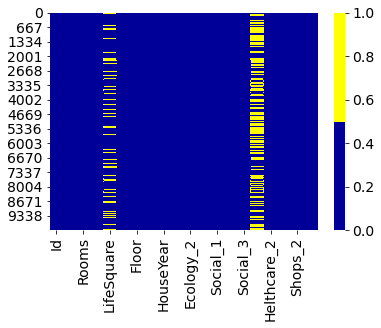

In [1573]:
cols = train_df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(train_df[cols].isnull(), cmap=sns.color_palette(colours))

In [1574]:
for col in train_df.columns:
    pct_missing = np.mean(train_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0%
DistrictId - 0%
Rooms - 0%
Square - 0%
LifeSquare - 21%
KitchenSquare - 0%
Floor - 0%
HouseFloor - 0%
HouseYear - 0%
Ecology_1 - 0%
Ecology_2 - 0%
Ecology_3 - 0%
Social_1 - 0%
Social_2 - 0%
Social_3 - 0%
Healthcare_1 - 48%
Helthcare_2 - 0%
Shops_1 - 0%
Shops_2 - 0%
Price - 0%


In [1575]:
train_df.drop(['Healthcare_1'], axis=1, inplace=True)

In [1576]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Price  

<AxesSubplot:>

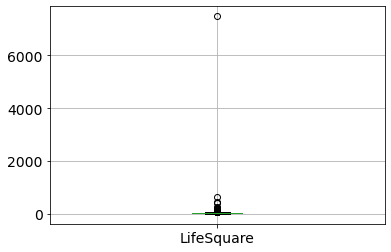

In [1577]:
train_df.boxplot(column=['LifeSquare'])

In [1578]:
med = train_df['LifeSquare'].median()
print(med)
train_df['LifeSquare'] = train_df['LifeSquare'].fillna(med)

32.78126019215574


In [1579]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1.319500,4.231300,0.082500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,0.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,0.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,2.000000,6.000000,0.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000,633233.466570


In [1580]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [1581]:
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

In [1582]:
cols = ['Square', 'LifeSquare', 'KitchenSquare']
Q1 = train_df[cols].quantile(0.25)
Q3 = train_df[cols].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df[cols] < (Q1 - 1.5 * IQR)) |(train_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [1583]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9.336000e+03,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,8373.654563,50.851435,1.832262,53.701015,33.016092,5.751392,8.444302,12.550021,4.131880e+03,0.120071,0.010176,0.029027,25.128856,5431.896744,8.009533,1.336654,4.259212,0.078406,208431.060458
std,4854.096437,43.952778,0.775586,15.389252,10.933504,3.752977,5.132910,6.440620,2.075079e+05,0.119553,0.100365,0.167892,17.470636,3994.181091,23.560664,1.482947,4.782295,0.268824,86295.680830
min,2.000000,0.000000,1.000000,13.784865,1.726270,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4158.750000,19.000000,1.000000,41.389037,24.580762,1.000000,4.000000,9.000000,1.973000e+03,0.017647,0.000000,0.000000,8.000000,1660.000000,0.000000,0.000000,1.000000,0.000000,151554.664343
50%,8386.500000,37.000000,2.000000,50.386586,32.781260,6.000000,7.000000,12.000000,1.977000e+03,0.075779,0.000000,0.000000,25.000000,5288.000000,2.000000,1.000000,3.000000,0.000000,189425.264451
75%,12584.250000,77.000000,2.000000,63.680979,38.504852,9.000000,12.000000,17.000000,1.998000e+03,0.195781,0.000000,0.000000,36.000000,7425.000000,5.000000,2.000000,6.000000,0.000000,243827.913146
max,16798.000000,209.000000,6.000000,102.032801,65.224603,20.000000,42.000000,99.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000,633233.466570


In [1584]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9336 non-null   int64  
 1   DistrictId     9336 non-null   int64  
 2   Rooms          9336 non-null   float64
 3   Square         9336 non-null   float64
 4   LifeSquare     9336 non-null   float64
 5   KitchenSquare  9336 non-null   float64
 6   Floor          9336 non-null   int64  
 7   HouseFloor     9336 non-null   float64
 8   HouseYear      9336 non-null   int64  
 9   Ecology_1      9336 non-null   float64
 10  Ecology_2      9336 non-null   int64  
 11  Ecology_3      9336 non-null   int64  
 12  Social_1       9336 non-null   int64  
 13  Social_2       9336 non-null   int64  
 14  Social_3       9336 non-null   int64  
 15  Helthcare_2    9336 non-null   int64  
 16  Shops_1        9336 non-null   int64  
 17  Shops_2        9336 non-null   int64  
 18  Price   

In [1585]:
train_df['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 37., 40., 44., 45., 48., 99.])

In [1586]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 42])

In [1587]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [1588]:
floor_outliers = train_df[train_df['Floor'] > train_df['HouseFloor']].index
print(len(floor_outliers))

train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

1452


In [1589]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [1590]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,8373.654563,50.851435,1.832262,53.701015,33.016092,5.751392,7.363646,12.861075,1983.964225,0.120071,0.010176,0.029027,25.128856,5431.896744,8.009533,1.336654,4.259212,0.078406,208431.060458
std,4854.096437,43.952778,0.775586,15.389252,10.933504,3.752977,4.946250,6.108156,17.927032,0.119553,0.100365,0.167892,17.470636,3994.181091,23.560664,1.482947,4.782295,0.268824,86295.680830
min,2.000000,0.000000,1.000000,13.784865,1.726270,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4158.750000,19.000000,1.000000,41.389037,24.580762,1.000000,3.000000,9.000000,1973.000000,0.017647,0.000000,0.000000,8.000000,1660.000000,0.000000,0.000000,1.000000,0.000000,151554.664343
50%,8386.500000,37.000000,2.000000,50.386586,32.781260,6.000000,6.000000,12.000000,1977.000000,0.075779,0.000000,0.000000,25.000000,5288.000000,2.000000,1.000000,3.000000,0.000000,189425.264451
75%,12584.250000,77.000000,2.000000,63.680979,38.504852,9.000000,10.000000,17.000000,1998.000000,0.195781,0.000000,0.000000,36.000000,7425.000000,5.000000,2.000000,6.000000,0.000000,243827.913146
max,16798.000000,209.000000,6.000000,102.032801,65.224603,20.000000,42.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000,633233.466570


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>],
       [<AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>],
       [<AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Ecology_2'}>,
        <AxesSubplot:title={'center':'Ecology_3'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>],
       [<AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Shops_2'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtyp

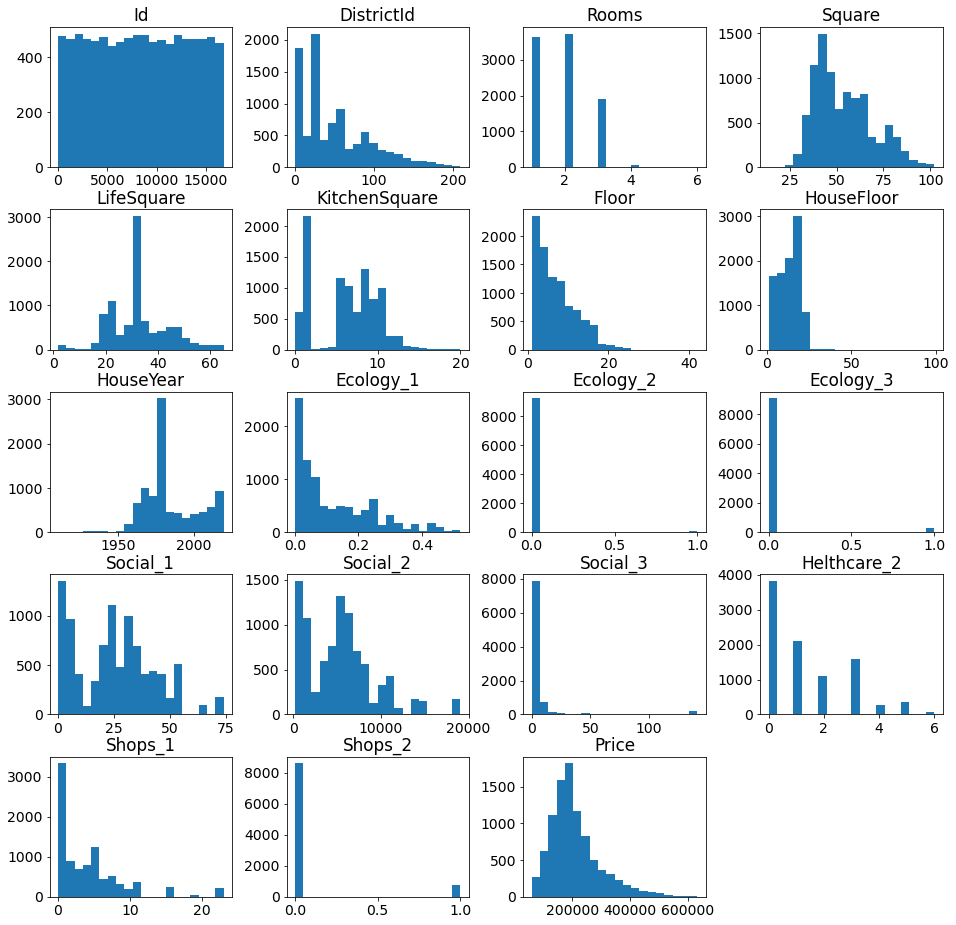

In [1591]:
train_df.hist(figsize=(16,16), bins=20, grid=False)

In [1592]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9336 non-null   int64  
 1   DistrictId     9336 non-null   int64  
 2   Rooms          9336 non-null   float64
 3   Square         9336 non-null   float64
 4   LifeSquare     9336 non-null   float64
 5   KitchenSquare  9336 non-null   float64
 6   Floor          9336 non-null   int64  
 7   HouseFloor     9336 non-null   float64
 8   HouseYear      9336 non-null   int64  
 9   Ecology_1      9336 non-null   float64
 10  Ecology_2      9336 non-null   int64  
 11  Ecology_3      9336 non-null   int64  
 12  Social_1       9336 non-null   int64  
 13  Social_2       9336 non-null   int64  
 14  Social_3       9336 non-null   int64  
 15  Helthcare_2    9336 non-null   int64  
 16  Shops_1        9336 non-null   int64  
 17  Shops_2        9336 non-null   int64  
 18  Price   

In [1593]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [1594]:
cat_colnames = test_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Ecology_2', 'Ecology_3', 'Shops_2']

In [1595]:
replace_dict = {'A': 1, 'B': 0}
test_df= test_df.replace(dict.fromkeys(cat_colnames, replace_dict))
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,0,0,11,2748,1,NaN,0,0,0
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,0,0,6,1437,3,NaN,0,2,0
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,0,0,30,7538,87,4702.0,5,5,0
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,0,0,23,4583,3,NaN,3,3,0
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,0,0,2,629,1,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,0,0,36,5992,0,NaN,1,1,0
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,0,0,1,264,0,NaN,0,1,0
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,0,0,74,19083,2,NaN,5,15,0
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,0,0,2,629,1,NaN,0,0,1


In [1596]:
med1 = test_df['Healthcare_1'].median()
print(med1)
test_df['Healthcare_1'] = test_df['Healthcare_1'].fillna(med1)

900.0


In [1597]:
test_df.loc[test_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = test_df['Rooms'].median()

In [1598]:
median = test_df['LifeSquare'].median()
print(median)
test_df['LifeSquare'] = test_df['LifeSquare'].fillna(med)

32.92508663208161


In [1599]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [1600]:
features = train_df.columns.drop('Id').drop('DistrictId').drop('Price')
target = 'Price'

In [1601]:
X = pd.DataFrame(train_df, columns=features)
y = pd.DataFrame(train_df, columns=[target])

In [1602]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [1603]:
X_test = test_df[features]
X_test.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,0,0,11,2748,1,0,0,0
1,2.0,69.263183,32.781260,1.0,6,1.0,1977,0.075779,0,0,6,1437,3,0,2,0
2,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,0,0,30,7538,87,5,5,0
3,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,0,0,23,4583,3,3,3,0
4,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,0,0,2,629,1,0,0,1


In [1604]:
scaler = StandardScaler()

In [1605]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

In [1606]:
model = RandomForestRegressor(n_estimators=1000, max_depth=9, max_features=7, random_state=42)
fit_pred(X_train_scaled, y_train, X_valid_scaled, y_valid, model)


r2_train = 0.8016214006531769, mae_train: 24925.647634022713
r2_test = 0.7171599038299385, mae_test: 28889.69841707205


In [1607]:
price = model.predict(X_test_scaled)

In [1608]:
pd.DataFrame({ 'Id': test_df['Id'], 'Price': price }).to_csv(TEST_DATASET_EXT_PATH, index=False)

In [1609]:
f = pd.read_csv(TEST_DATASET_EXT_PATH)
f.head()

,Id,Price
0,725,172820.449139
1,15856,183924.729341
2,5480,193086.605693
3,15664,337570.961006
4,14275,135970.479552
